# Class 2: Solving classic problems for linear regression. 

---

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn import datasets
from sklearn.model_selection import train_test_split

import scipy as sp
from scipy.stats import norm

Recall the linearly separable dataset from the last class

In [29]:
def class_gen(samples=20):
    mu_1 = np.array([4, 4])
    mu_2 = np.array([-4,-4])
    sigma = 7*np.eye(2,2)
    class1 = np.random.multivariate_normal(mu_1, sigma, samples)    
    class2 = np.random.multivariate_normal(mu_2, sigma, samples)
    return class1, class2

but now let us build non separable data

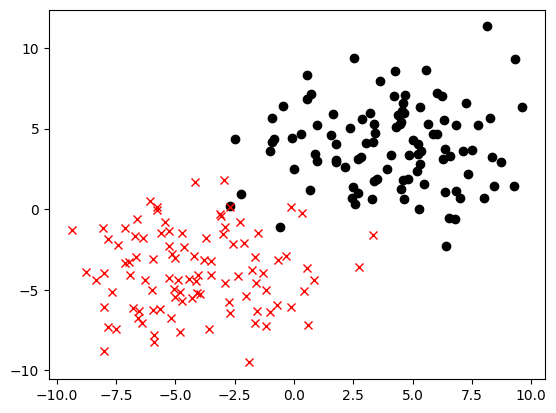

In [30]:
class_samples = 100
class1, class2 = class_gen(class_samples)
fig, ax = plt.subplots()
ax.plot(class1[:,0], class1[:,1], 'ok')
ax.plot(class2[:,0], class2[:,1], 'xr')

In [8]:
Y1 = np.ones((class_samples,1))
Y2 = -1 * Y1; 
Y_label = np.vstack([Y1,Y2])

## Data Augmentation 

In [11]:
X = np.vstack([class1,class2]);
extra_dimension = np.ones((2*class_samples,1));
X_tilde = np.hstack([extra_dimension,X])
CovX = np.matmul(X_tilde.T, X_tilde)
W = np.matmul( np.linalg.inv(CovX) , np.matmul(X_tilde.T,Y_label) )
estimated_value = np.matmul(X_tilde, W)
predicted_labels  = np.sign(estimated_value)

sum( predicted_labels == Y_label )#/(predicted_labels.shape[0])


array([39344])